## Assignment 7.2
### Exercises 7 - 1, 8 - 1, and 8 - 2

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT

In [1]:
# Imports
import first
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

## Exercise 7 - 1

*Using data from the NSFG, make a scatter plot of birth weight versus mother's age. Plot percentiles of birth weight versus mother's age. Compute Pearson's and Spearman's correlations. How would you characterize the relationshp between these variables?*

In [2]:
# Read the Female Pregnancy Dataset
preg_df, firsts_df, others_df = first.MakeFrames()
preg_df.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


In [3]:
# drop and rows that are missing from age and birth weight
preg_df = preg_df.dropna(subset = ['agepreg', 'totalwgt_lb'])
preg_df[['agepreg', 'totalwgt_lb']].head()

,agepreg,totalwgt_lb
0,33.16,8.8125
1,39.25,7.8750
2,14.33,9.1250
3,17.83,7.0000
4,18.33,6.1875


In [4]:
# put ages into own dataframe
ages_df = preg_df['agepreg']
ages_df.head()

0    33.16
1    39.25
2    14.33
3    17.83
4    18.33
Name: agepreg, dtype: float64

In [5]:
# put weights into own dataframe
weights_df = preg_df['totalwgt_lb']
weights_df.head()

0    8.8125
1    7.8750
2    9.1250
3    7.0000
4    6.1875
Name: totalwgt_lb, dtype: float64

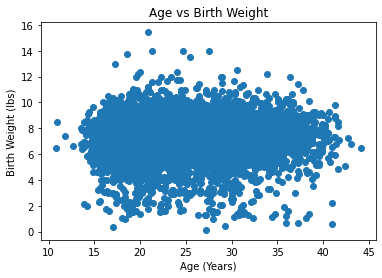

In [6]:
# Scatter Plot of Birth Weight vs Mother's Age
plt.scatter(ages_df, weights_df)
plt.xlabel('Age (Years)')
plt.ylabel('Birth Weight (lbs)')
plt.title('Age vs Birth Weight')
plt.show()

In [7]:
# compute percentiles for each age
min_age = int(min(ages_df))
max_age = int(max(ages_df))


weight_dict = {}

# create an array for each age
for i in range(min_age, max_age + 1):
    weight_dict[i] = []

# add weights for each age into array
for a, w in zip(ages_df, weights_df):
    age = int(a)
    weight_dict[age].append(w)

# compute percentiles for each age
for a in weight_dict:
    weight_dict[a] = np.array(weight_dict[a])
    weight_dict[a] = [np.percentile(weight_dict[a], 25),
                      np.percentile(weight_dict[a], 50),
                      np.percentile(weight_dict[a], 75)]

int_ages = []
p_25 = []
p_50 = []
p_75 = []

# create arrays for each percentile and ages
for a in weight_dict:
    int_ages.append(a)
    p_25.append(weight_dict[a][0])
    p_50.append(weight_dict[a][1])
    p_75.append(weight_dict[a][2])    

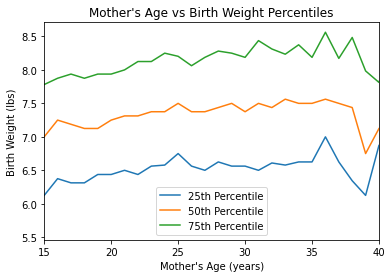

In [8]:
# Plot percentiles
plt.plot(int_ages, p_25, label = '25th Percentile')
plt.plot(int_ages, p_50, label = '50th Percentile')
plt.plot(int_ages, p_75, label = '75th Percentile')

plt.xlabel("Mother's Age (years)")
plt.ylabel('Birth Weight (lbs)')

plt.xlim(15, 40) # remove outliers

plt.title("Mother's Age vs Birth Weight Percentiles")

plt.legend()
plt.show()

In [9]:
# Compute Pearson's correlations
pearson_corr = scipy.stats.pearsonr(ages_df, weights_df)
pearson_corr

(0.0688339703541091, 5.72294710722828e-11)

In [10]:
# Compute Spearman's correlations
spearman_corr = scipy.stats.spearmanr(ages_df, weights_df)
spearman_corr

SpearmanrResult(correlation=0.09461004109658226, pvalue=1.9975811921504994e-19)

Spearman's correlation of 0.09 is higher than Pearson's of 0.07 which suggests that Pearson's may have some influence with the outliers in the data.

## Exercise 8 - 1

*In this chapter we used $\bar{x}$ and median to estimate $\mu$, and found that $\bar{x}$ yields lower MSE. Also we used $S^2$ and $S^2_{n-1}$ to estimate $\sigma$. and found that $S^2$ is biased and  $S^2_{n-1}$ is unbiased.*

*Run similar experiments to see if $\bar{x}$ and median are biased estimates of $\sigma$. Also, check whether $S^2$ or $S^2_{n-1}$ yields a lower MSE.*

In [11]:
# set parameters for our distribution
mu = 0
sigma = 1

means = []
medians = []

iters = 10000
n = 10

for _ in range(iters):
    xs = [np.random.normal(mu, sigma) for i in range(n)]
    xbar = np.mean(xs)
    median = np.median(xs)
    means.append(xbar)
    medians.append(median) 

In [12]:
# get mean error
means = np.array(means)
means -= mu
print(f'Mean Error xbar {np.mean(means)}')

medians = np.array(medians)
medians -= mu
print(f'Mean Error median {np.mean(medians)}')

Mean Error xbar 0.007446783709877107
Mean Error median 0.005877190795783843


Both xbar and median are very small and look to be unbiased.

In [13]:
# similar set up for S^2 and the other
mu = 0
sigma = 1

s2 = []
s2n1 = []

iters = 10000
n = 10

for _ in range(iters):
    xs = [np.random.normal(mu, sigma) for i in range(n)]
    var = np.var(xs)
    varn1 = np.var(xs, ddof = 1)
    s2.append(var)
    s2n1.append(varn1) 

In [14]:
# get MSE
s2 = np.array(s2)
s2 -= sigma
print(f'MSE for s2: {np.mean(s2**2)}')

s2n1 = np.array(s2n1)
s2n1 -= sigma
print(f'MSE for s2n-1: {np.mean(s2n1**2)}')

MSE for s2: 0.19697680186839628
MSE for s2n-1: 0.2311533958990705


The sample variance has a smaller Mean Squared Error than the other method

## Exercise 8 - 2

*Suppose that you draw a sample with size n = 10 from an exponential distribution with $\lambda$ = 2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.*

*Repeat the experiment with a few different values of n and make a plot of standard error versus n*

In [15]:
# set up parameters
lam = 2
n = 10
iters = 1000

Ls = []

for _ in range(iters):
    xs = [np.random.exponential(1/lam) for i in range(n)]
    L = 1 / np.mean(xs)
    Ls.append(L)

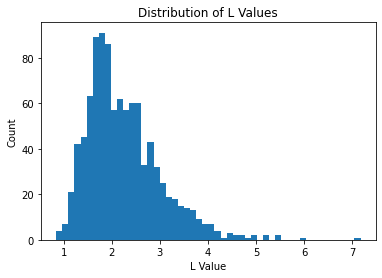

RMSE: {RMSE}
90 Percent Confidence Interval: 1.273597065895343 - 3.6769102592692935


In [20]:
# get RMSE
Ls = np.array(Ls)
LDiff = Ls - lam
LDiff2 = LDiff**2
RMSE = np.sqrt(np.mean(LDiff2))

# 90 percent confidence
fivep = np.percentile(Ls, 5) # minimum
nintyfivep = np.percentile(Ls, 95) # maximim

# plot the distribution
plt.hist(Ls, bins = 50)
plt.xlabel('L Value')
plt.ylabel('Count')
plt.title('Distribution of L Values')
plt.show()

print('RMSE: {RMSE}')
print(f'90 Percent Confidence Interval: {fivep} - {nintyfivep}')

In [17]:
# function time
def lambda_error(n):
    lam = 2
    iters = 1000

    Ls = []

    for _ in range(iters):
        xs = [np.random.exponential(1/lam) for i in range(n)]
        L = 1 / np.mean(xs)
        Ls.append(L)
        
    Ls = np.array(Ls)
    LDiff = Ls - lam
    LDiff2 = LDiff**2
    RMSE = np.sqrt(np.mean(LDiff2))
    
    return RMSE

In [21]:
# n ranging from 4 to 20
ns = range(4,21)
errors = [lambda_error(n) for n in ns]

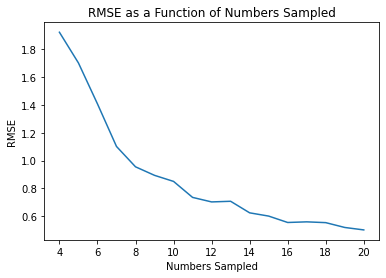

In [22]:
plt.plot(ns, errors)
plt.xlabel('Numbers Sampled')
plt.ylabel('RMSE')
plt.title('RMSE as a Function of Numbers Sampled')
plt.show()

With a 90% confidence level, as the sample size increases the standard error decreases.